### 1 Попробуйте обучить нейронную сеть на TensorFlow 2 на любом датасете (fachion_mnist, mdb_reviews, boston_housing ). Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

from sklearn.metrics import accuracy_score

tf.keras.backend.clear_session()  # For easy reset of notebook state.

#### Скачиваем датасет с отзывами о фильмах

In [2]:
imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    path='imdb.npz',
    num_words=None,
    skip_top=0,
    maxlen=None,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3
)

In [3]:
x_train.shape

(25000,)

In [4]:
len(x_train[0]), len(x_train[1]), len(x_train[10])

(218, 189, 450)

In [5]:
y_train.shape

(25000,)

In [6]:
x_test.shape

(25000,)

In [7]:
y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [8]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=256)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, padding='post', maxlen=256)

len(x_train[0]), len(x_train[1]), len(x_train[10])

(256, 256, 256)

In [9]:
x_train[0].shape

(256,)

In [10]:
vocab_size = 88587
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1417392   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,417,681
Trainable params: 1,417,681
Non-trainable params: 0
_________________________________________________________________


#### Сначала построим базовую модель 

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.5584 - accuracy: 0.6551 - val_loss: 0.3639 - val_accuracy: 0.8262
Epoch 2/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.2683 - accuracy: 0.8923 - val_loss: 0.2798 - val_accuracy: 0.8804
Epoch 3/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.1754 - accuracy: 0.9323 - val_loss: 0.2693 - val_accuracy: 0.8880
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.1222 - accuracy: 0.9580 - val_loss: 0.2728 - val_accuracy: 0.8954
Epoch 5/10
20000/20000 [==============================] - 24s 1ms/sample - loss: 0.0842 - accuracy: 0.9740 - val_loss: 0.2877 - val_accuracy: 0.8910
Epoch 6/10
20000/20000 [==============================] - 23s 1ms/sample - loss: 0.0586 - accuracy: 0.9836 - val_loss: 0.3100 - val_accuracy: 0.8936
Epoch 7/10
20000/20000 [==============================] -

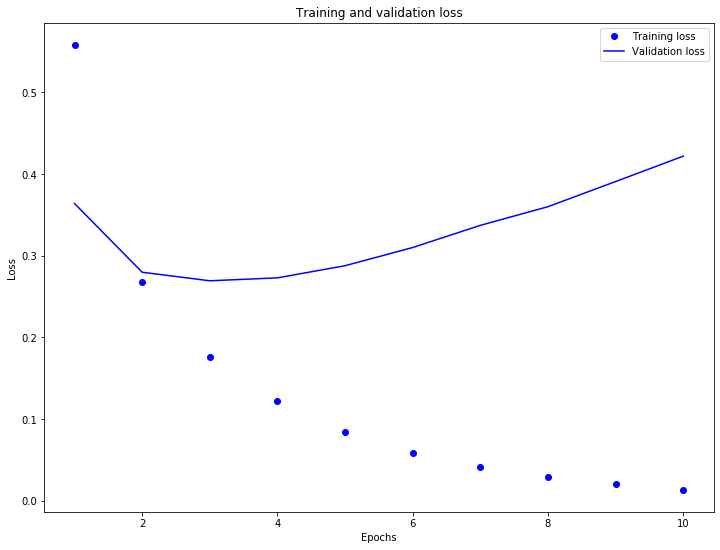

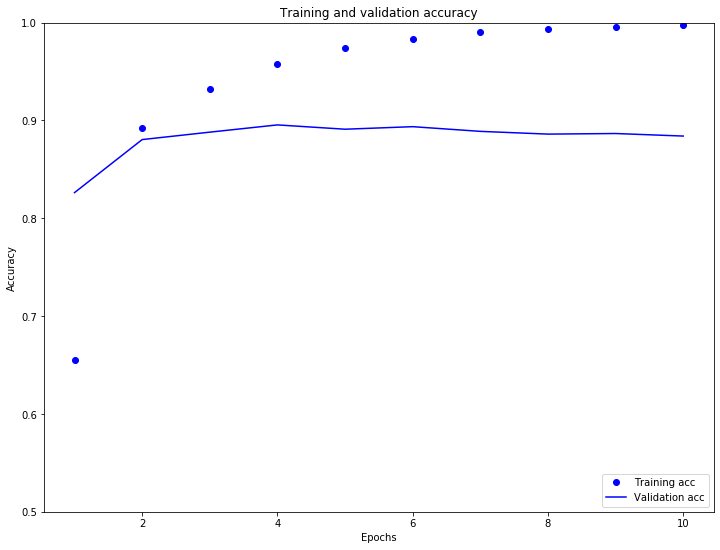

In [12]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [13]:
model.evaluate(
  x_test,
  y_test
)

25000/25000 [==============================] - 2s 83us/sample - loss: 0.4889 - accuracy: 0.8601


[0.4889221109521389, 0.86012]

#### Теперь попробуем стекинг трех моделей

In [14]:
model_1 = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model_2 = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model_3 = keras.Sequential([
  layers.Embedding(vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

In [15]:
model_1.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
hist1 = model_1.fit(x_train, y_train, epochs=4)
hist2 = model_2.fit(x_train, y_train, epochs=5)
hist3 = model_3.fit(x_train, y_train, epochs=6)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.5120 - accuracy: 0.6822
Epoch 2/4
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.2472 - accuracy: 0.8996
Epoch 3/4
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.1682 - accuracy: 0.9374
Epoch 4/4
25000/25000 [==============================] - 30s 1ms/sample - loss: 0.1174 - accuracy: 0.9601
Train on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 31s 1ms/sample - loss: 0.5114 - accuracy: 0.6817
Epoch 2/5
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.2473 - accuracy: 0.8996
Epoch 3/5
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.1672 - accuracy: 0.9374
Epoch 4/5
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.1178 - accuracy: 0.9594
Epoch 5/5
25000/25000 [==============================] - 29s 1ms/sample - loss: 0.0833 - accuracy: 0.9740


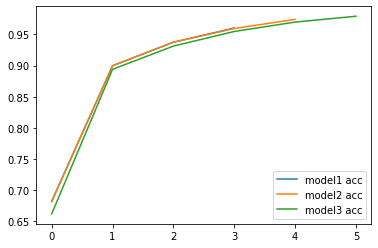

In [17]:
plt.plot(hist1.history['accuracy'],label='model1 acc')
plt.plot(hist2.history['accuracy'],label='model2 acc')
plt.plot(hist3.history['accuracy'],label ='model3 acc')
plt.legend()
plt.show()

In [18]:
model_1.save_weights('model1.h5')
model_2.save_weights('model2.h5')
model_3.save_weights('model3.h5')

In [19]:
input1 = keras.layers.Input(shape=(256,))

x1 = keras.layers.Embedding(vocab_size, embedding_dim)(input1)
x1 = keras.layers.GlobalAveragePooling1D()(x1)
x1 = keras.layers.Dense(16, activation='relu')(x1)
x1 = keras.layers.Dense(1)(x1)

model11 = keras.models.Model(inputs=input1, outputs=x1)

In [20]:
x2 = keras.layers.Embedding(vocab_size, embedding_dim)(input1)
x2 = keras.layers.GlobalAveragePooling1D()(x2)
x2 = keras.layers.Dense(16, activation='relu')(x2)
x2 = keras.layers.Dense(1)(x2)

model22 =keras.models.Model(inputs=input1, outputs=x2)

In [21]:
x3 = keras.layers.Embedding(vocab_size, embedding_dim)(input1)
x3 = keras.layers.GlobalAveragePooling1D()(x3)
x3 = keras.layers.Dense(16, activation='relu')(x3)
x3 = keras.layers.Dense(1)(x3)

model33 =keras.models.Model(inputs=input1, outputs=x3)

In [22]:
model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

out_all = keras.layers.Average()([model11.output, model22.output, model33.output])
out_all = keras.layers.Dense(1)(out_all)
model_all = keras.models.Model(inputs =[input1], outputs=out_all)

In [23]:
model_all.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256)]        0                                            
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 256, 16)      1417392     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 256, 16)      1417392     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 256, 16)      1417392     input_1[0][0]                    
____________________________________________________________________________________________

In [24]:
from tensorflow.keras.utils import plot_model

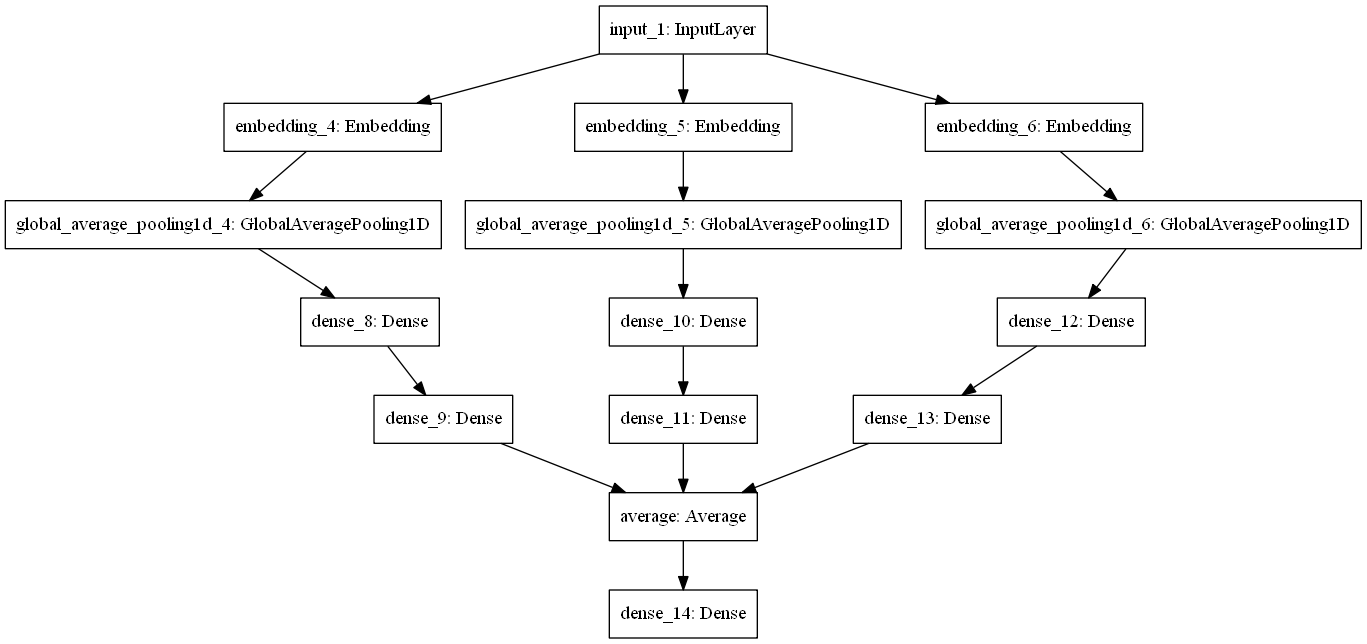

In [25]:
plot_model(model_all)

In [26]:
model_all.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model_all.evaluate(
  x_test,
  y_test
)

25000/25000 [==============================] - 3s 128us/sample - loss: 0.3110 - accuracy: 0.8609


[0.31099341433525085, 0.86088]

Результат практически не улучшился